In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('EHB_ACTIVE_GRANT_FA_AGR.csv')

In [5]:
# df.head()
# df.columns

In [3]:
# only keep relevant columns
grant_data = df[['Award Year', 'Total Active Grant Financial Assistance', 'Grantee City', 'State Name', 'Grantee ZIP Code', 'Uniform Data System Grant Program Description', 'Grantee County Name', 'Complete County Name','HRSA Region']]

In [4]:
grant_data.tail()

,Award Year,Total Active Grant Financial Assistance,Grantee City,State Name,Grantee ZIP Code,Uniform Data System Grant Program Description,Grantee County Name,Complete County Name,HRSA Region
24213,2021,148587.0,Astoria,Oregon,97103-3329,This notice announces the opportunity to apply...,Clatsop,Clatsop County,Region 10
24214,2021,49529.0,Jonesboro,Arkansas,72404-6897,This notice announces the opportunity to apply...,Craighead,Craighead County,Region 6
24215,2020,300000.0,Bamberg,South Carolina,29003-8361,NaN,Bamberg,Bamberg County,Region 4
24216,2021,300000.0,Bamberg,South Carolina,29003-8361,NaN,Bamberg,Bamberg County,Region 4
24217,2021,49529.0,Woodville,Texas,75979-4738,This notice announces the opportunity to apply...,Tyler,Tyler County,Region 6


In [6]:
#filter for only awards in 2019 
grant_data_2019 = grant_data[grant_data['Award Year'] == 2019]
grant_data_2019 = grant_data_2019.reset_index()

#dropna values 
grant_data_2019 = grant_data_2019.dropna()

In [ ]:
# now we want to get county level data
# go from county to population size and determine funding for large vs small counties 

In [7]:
cbsa = pd.read_csv('cbsa2fipsxw.csv')
cbsa.head()

In [8]:
# get grant assistance per state 
# grants_per_county = grant_data_2019.groupby(by='Complete County Name')['Total Active Grant Financial Assistance'].sum().reset_index()
# grants_per_county.head()

grant_data_2019['Mental Health Assistance'] = grant_data_2019.apply(lambda row: row['Total Active Grant Financial Assistance']\
                                                                               if 'mental health' in row['Uniform Data System Grant Program Description'] else 0, axis =1)

grants_per_county = grant_data_2019.groupby(by=['Complete County Name', 'State Name'])[['Total Active Grant Financial Assistance', 'Mental Health Assistance']].sum().reset_index()
grants_per_county.head()



,Complete County Name,State Name,Total Active Grant Financial Assistance,Mental Health Assistance
0,Accomack County,Virginia,5397224.0,0.0
1,Ada County,Idaho,5059613.0,344262.0
2,Adair County,Missouri,3204629.0,0.0
3,Adams County,Colorado,549040.0,130000.0
4,Adams County,Idaho,1318355.0,0.0


In [9]:
cbsa_data = cbsa[['countycountyequivalent', 'centraloutlyingcounty', 'statename', 'cbsacode']]

#cbsa_data.head()
# merge total grants and mental health grants
grants_per_county_cbsa = grants_per_county.merge(cbsa_data, how='left', left_on='Complete County Name', right_on='countycountyequivalent')

grants_per_county_cbsa.head()

,Complete County Name,State Name,Total Active Grant Financial Assistance,Mental Health Assistance,countycountyequivalent,centraloutlyingcounty,statename,cbsacode
0,Accomack County,Virginia,5397224.0,0.0,NaN,NaN,NaN,NaN
1,Ada County,Idaho,5059613.0,344262.0,Ada County,Central,Idaho,14260.0
2,Adair County,Missouri,3204629.0,0.0,Adair County,Central,Missouri,28860.0
3,Adams County,Colorado,549040.0,130000.0,Adams County,Central,Colorado,19740.0
4,Adams County,Colorado,549040.0,130000.0,Adams County,Central,Illinois,39500.0


## Merge CBSA dataset to grants by County

In [10]:
grants_per_county_cbsa = grants_per_county.merge(cbsa_data, how='inner', left_on=['Complete County Name', 'State Name'], right_on=['countycountyequivalent', 'statename'])


grants_per_county_cbsa['Outlying'] = grants_per_county_cbsa['centraloutlyingcounty'].apply(lambda x: 1 if x =='Outlying' else 0)

grants_per_county_cbsa.tail(10)

,Complete County Name,State Name,Total Active Grant Financial Assistance,Mental Health Assistance,countycountyequivalent,centraloutlyingcounty,statename,cbsacode,Outlying
689,Yamhill County,Oregon,424054.0,0.0,Yamhill County,Outlying,Oregon,38900.0,1
690,Yates County,New York,381447.0,0.0,Yates County,Outlying,New York,40380.0,1
691,Yavapai County,Arizona,2040025.0,0.0,Yavapai County,Central,Arizona,39140.0,0
692,Yellowstone County,Montana,8628304.0,0.0,Yellowstone County,Central,Montana,13740.0,0
693,Yolo County,California,5910601.0,349995.0,Yolo County,Outlying,California,40900.0,1
694,York County,Maine,1223178.0,0.0,York County,Central,Maine,38860.0,0
695,York County,Pennsylvania,3610464.0,0.0,York County,Central,Pennsylvania,49620.0,0
696,York County,South Carolina,4047019.0,0.0,York County,Outlying,South Carolina,16740.0,1
697,Yuba County,California,1299842.0,0.0,Yuba County,Central,California,49700.0,0
698,Yuma County,Arizona,6364930.0,0.0,Yuma County,Central,Arizona,49740.0,0


In [11]:
grants_per_county_cbsa[["Outlying", "Total Active Grant Financial Assistance", 'Mental Health Assistance']].corr()

,Outlying,Total Active Grant Financial Assistance,Mental Health Assistance
Outlying,1.000000,-0.104939,-0.046807
Total Active Grant Financial Assistance,-0.104939,1.000000,0.330125
Mental Health Assistance,-0.046807,0.330125,1.000000


Text(0.5, 1.0, 'Population size vs. Mental Health Assitance')

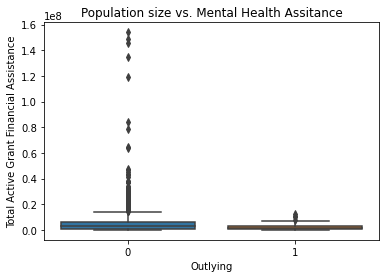

In [12]:
sns.boxplot(x = "Outlying", y='Total Active Grant Financial Assistance', data = grants_per_county_cbsa)
plt.title("Population size vs. Mental Health Assitance")

In [13]:
outlying = grants_per_county_cbsa[grants_per_county_cbsa['Outlying'] == 1]

central = grants_per_county_cbsa[grants_per_county_cbsa['Outlying'] == 0]

outlying[['Total Active Grant Financial Assistance','Mental Health Assistance']].describe()

,Total Active Grant Financial Assistance,Mental Health Assistance
count,8.100000e+01,81.000000
mean,2.319523e+06,24881.629630
std,2.474019e+06,118951.811785
min,3.881000e+03,0.000000
25%,4.794300e+05,0.000000
50%,1.650337e+06,0.000000
75%,3.281448e+06,0.000000
max,1.205123e+07,725000.000000


In [14]:
central[['Total Active Grant Financial Assistance','Mental Health Assistance']].describe()

,Total Active Grant Financial Assistance,Mental Health Assistance
count,6.180000e+02,6.180000e+02
mean,7.103387e+06,5.077628e+04
std,1.541946e+07,1.833308e+05
min,9.263000e+03,0.000000e+00
25%,1.002022e+06,0.000000e+00
50%,3.002804e+06,0.000000e+00
75%,6.329821e+06,0.000000e+00
max,1.540145e+08,2.484011e+06


Text(0.5, 1.0, 'Population size vs. Total Assitance')

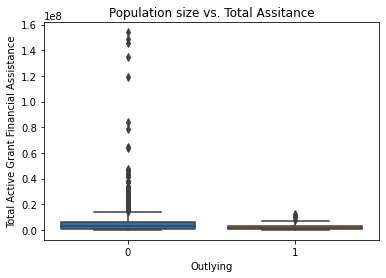

In [15]:
sns.boxplot(x = "Outlying", y='Total Active Grant Financial Assistance', data = grants_per_county_cbsa)
plt.title("Population size vs. Total Assitance")

In [17]:
grants_per_county_cbsa.to_csv(r'/Users/chiufengyap/OneDrive - The University of Texas Health Science Center at Houston/DS4A/Project/correlationone_team2/Data/grants_per_county_cbsa.csv', index=False)